# Neural network to approximate Runge's function

In [1]:
# Imports
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)
import json

from functions import runge, OLS_parameters, MSE
from functions import ReLU, ReLU_der, sigmoid, sigmoid_der, softmax, softmax_vec, mse_der
from functions import MSE, identity, identity_der, R2
from nn_class import NeuralNetwork

OLS mse: 0.010975094308561558
OLS R2: 0.8471780118227936


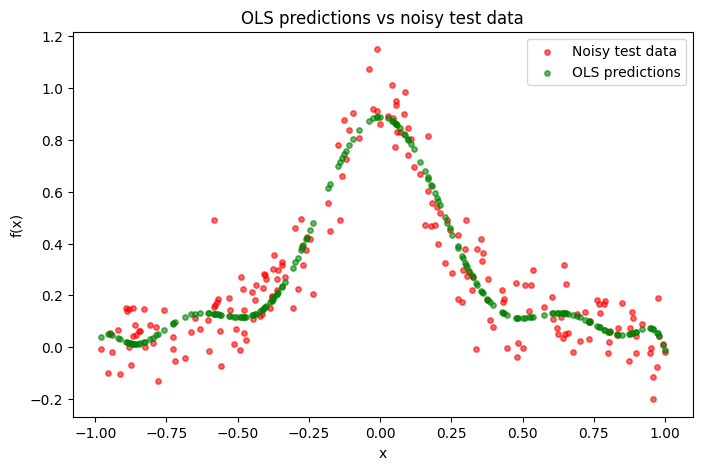

Saved OLS metrics to ols_metrics.json


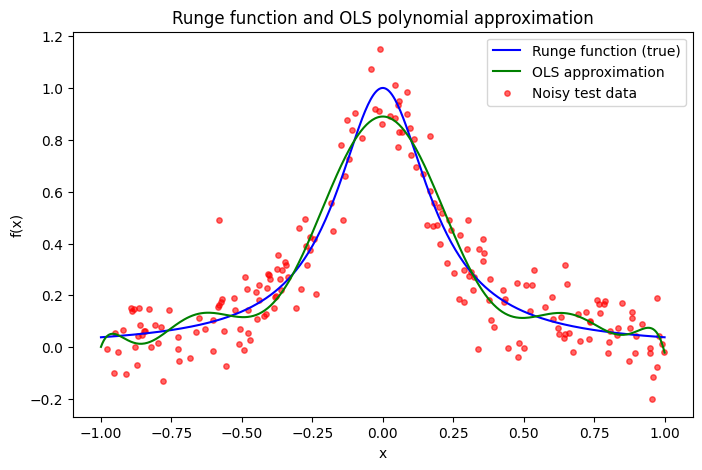

In [2]:
np.random.seed(42)
n = 1000
# data set from project 1
x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()

poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(x_train)
X_test = poly.fit_transform(x_test)
# scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# OLS
beta = OLS_parameters(X_train_s, y_train)
y_test_tilde = X_test_s @ beta + y_offset
y_train_tilde = X_train_s @ beta + y_offset

targets = y_test
print('OLS mse:', MSE(targets, y_test_tilde))
print('OLS R2:', R2(targets, y_test_tilde))

mse_OLS = MSE(targets, y_test_tilde)
R2_OLS = R2(targets, y_test_tilde)

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, label='Noisy test data', color='red', s=15, alpha=0.6)
plt.scatter(x_test, y_test_tilde, label='OLS predictions', color='green', s=15, alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('OLS predictions vs noisy test data')
plt.show()

metrics = {"mse": float(mse_OLS), "r2": float(R2_OLS)}
with open("ols_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("Saved OLS metrics to ols_metrics.json")

# Smooth Runge curve and OLS approximation over a fine grid
xx = np.linspace(-1, 1, 400).reshape(-1, 1)
yy = runge(xx)

# Create polynomial features for the grid, scale and predict with OLS beta
XX = poly.transform(xx)
XX_s = scaler.transform(XX)
y_ols = XX_s @ beta + y_offset

plt.figure(figsize=(8, 5))
plt.plot(xx, yy.ravel(), label='Runge function (true)', color='blue')
plt.plot(xx, y_ols.ravel(), label='OLS approximation', color='green')
plt.scatter(x_test, (y_test).ravel(), label='Noisy test data', color='red', s=15, alpha=0.6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Runge function and OLS polynomial approximation')
plt.show()

In [3]:
# One layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [50, 1]
activation_funcs = [sigmoid, identity]
activation_ders = [sigmoid_der, identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train

NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
)

NN.train_network_plain_gd(max_iter=1000000000)

targets = y_test

predictions = NN.predict(x_test_s)
print('NN mse:', MSE(predictions, targets))
print('NN R2:', R2(predictions, targets))

mse_NN_50_sigmoid_plain_no = MSE(predictions, targets)
R2_NN_50_sigmoid_plain_no = R2(predictions, targets)

metrics = {"mse": float(mse_NN_50_sigmoid_plain_no), "r2": float(R2_NN_50_sigmoid_plain_no)}
with open("nn_50_sigmoid_plain_no_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

Early stopping at iteration 952746, cost change 1.00e-10 <= 1e-10
NN mse: 0.009547462742712893
NN R2: 0.8836684222010286


In [5]:
# One layer, 100 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [100, 1]
activation_funcs = [sigmoid, identity]
activation_ders = [sigmoid_der, identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train

NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
)

NN.train_network_plain_gd(max_iter=1000000000)

targets = y_test

predictions = NN.predict(x_test_s)
print('NN mse:', MSE(predictions, targets))
print('NN R2:', R2(predictions, targets))

mse_NN_100_sigmoid_plain_no = MSE(predictions, targets)
R2_NN_100_sigmoid_plain_no = R2(predictions, targets)

metrics = {"mse": float(mse_NN_100_sigmoid_plain_no), "r2": float(R2_NN_100_sigmoid_plain_no)}
with open("nn_100_sigmoid_plain_no_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

Early stopping at iteration 1183987, cost change 1.00e-10 <= 1e-10
NN mse: 0.009589568120116574
NN R2: 0.883153871935872


In [ ]:
# 2 layer, 50 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [50, 50, 1]
activation_funcs = [sigmoid, sigmoid, identity]
activation_ders = [sigmoid_der, sigmoid_der, identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train

NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
)

NN.train_network_plain_gd(max_iter=1000000000)

targets = y_test

predictions = NN.predict(x_test_s)
print('NN mse:', MSE(predictions, targets))
print('NN R2:', R2(predictions, targets))

mse_NN_50_50_sigmoid_plain_no = MSE(predictions, targets)
R2_NN_50_50_sigmoid_plain_no = R2(predictions, targets)

metrics = {"mse": float(mse_NN_50_50_sigmoid_plain_no), "r2": float(R2_NN_50_50_sigmoid_plain_no)}
with open("nn_50_50_sigmoid_plain_no_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

In [6]:
# 2 layer, 100 neurons, sigmoid activation function, plain gradient descent, no optimizations
layer_output_sizes = [100, 100, 1]
activation_funcs = [sigmoid, sigmoid, identity]
activation_ders = [sigmoid_der, sigmoid_der, identity_der]

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
inputs = x_train_s
targets = y_train

NN = NeuralNetwork(
    x_train_s,
    targets,
    layer_output_sizes,
    activation_funcs,
    activation_ders,
    MSE,
    mse_der,
)

NN.train_network_plain_gd(max_iter=1000000000)

targets = y_test

predictions = NN.predict(x_test_s)
print('NN mse:', MSE(predictions, targets))
print('NN R2:', R2(predictions, targets))

mse_NN_100_100_sigmoid_plain_no = MSE(predictions, targets)
R2_NN_100_100_sigmoid_plain_no = R2(predictions, targets)

metrics = {"mse": float(mse_NN_100_100_sigmoid_plain_no), "r2": float(R2_NN_100_100_sigmoid_plain_no)}
with open("nn_100_100_sigmoid_plain_no_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

KeyboardInterrupt: 